# Car Price Prediction


In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train_data = pd.read_csv("train-data.csv")
test_data = pd.read_csv("test-data.csv")

In [3]:
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
train_data.shape

(6019, 14)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
train_data.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


# Data Cleaning

In [7]:
# "Unnamed column" is not useful, so do not take it into the training data
train_data = train_data.iloc[:, 1:]
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [8]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.0,53000.00,73000.00,6500000.0
Seats,5977.0,5.278735,0.808840,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


In [9]:
#Check for null values
train_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [10]:
#Let's drop sum Rows which contain NULL values.
#I ignored New_Price as there are many cells which contain NULL values in this column

train_data = train_data[train_data['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",train_data.shape)
train_data = train_data[train_data['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine: ",train_data.shape)
train_data = train_data[train_data['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power: ",train_data.shape)
train_data = train_data[train_data['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats: ",train_data.shape)

Shape of train data After dropping Rows with NULL values in Mileage:  (6017, 13)
Shape of train data After dropping Rows with NULL values in Engine:  (5981, 13)
Shape of train data After dropping Rows with NULL values in Power:  (5981, 13)
Shape of train data After dropping Rows with NULL values in Seats:  (5975, 13)


In [11]:
train_data = train_data.reset_index(drop=True)

In [12]:
#Let's do some Feature Engineering

for i in range(train_data.shape[0]):
    train_data.at[i, "Company"] = train_data["Name"][i].split()[0]
    train_data.at[i, "Mileage(km/kg)"] = train_data["Mileage"][i].split()[0] 
    train_data.at[i, "Engine(CC)"] = train_data["Engine"][i].split()[0]
    train_data.at[i, "Power(bhp)"] = train_data["Power"][i].split()[0]

In [13]:
train_data["Mileage(km/kg)"] = train_data["Mileage(km/kg)"].astype(float)
train_data["Engine(CC)"] = train_data["Engine(CC)"].astype(float)
#train_data["Power(bhp)"] = train_data["Power(bhp)"].astype(float)

At this point when I tried to change Power(bhp) to float an error occured (Can't convert str to float : null). 
So, I started investigating and found cell 76 having values: 'null bhp'

In [14]:
train_data['Power'][76]

'null bhp'

In [15]:
# Remove the indexes from the values

x = 'N'
count = 0
position = []
for i in range(train_data.shape[0]):
    if train_data['Power(bhp)'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)
print(x)
print(count)
print(position)

Y
103
[76, 79, 89, 120, 143, 225, 242, 259, 304, 305, 383, 421, 425, 440, 469, 572, 628, 644, 645, 735, 744, 824, 910, 921, 929, 1063, 1138, 1148, 1266, 1313, 1338, 1380, 1411, 1546, 1569, 1640, 1663, 1848, 1989, 2043, 2118, 2152, 2250, 2254, 2292, 2328, 2377, 2425, 2434, 2481, 2485, 2511, 2561, 2579, 2616, 2621, 2868, 3010, 3038, 3081, 3166, 3224, 3266, 3414, 3491, 3506, 3562, 3601, 3611, 3618, 3642, 3706, 3868, 3900, 3969, 4046, 4049, 4318, 4321, 4593, 4672, 4676, 4706, 4792, 4848, 4862, 4914, 5024, 5078, 5186, 5383, 5395, 5415, 5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941]


In [16]:
train_data = train_data.drop(train_data.index[position])
train_data = train_data.reset_index(drop=True)

In [17]:
train_data.shape

(5872, 17)

In [18]:
train_data["Power(bhp)"] = train_data["Power(bhp)"].astype(float)

In [19]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.80


In [20]:
for i in range(train_data.shape[0]):
    if pd.isnull(train_data.loc[i, "New_Price"]) == False:
       train_data.at[i, "New_car_Price"] = train_data["New_Price"][i].split()[0]

In [21]:
train_data["New_car_Price"] = train_data["New_car_Price"].astype(float)

In [22]:
# Now delete all useless features

train_data.drop(["Name"],axis=1,inplace=True)
train_data.drop(["Mileage"],axis=1,inplace=True)
train_data.drop(["Engine"],axis=1,inplace=True)
train_data.drop(["Power"],axis=1,inplace=True)
train_data.drop(["New_Price"],axis=1,inplace=True)

In [23]:
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


# Data Visualization

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Seats              5872 non-null   float64
 7   Price              5872 non-null   float64
 8   Company            5872 non-null   object 
 9   Mileage(km/kg)     5872 non-null   float64
 10  Engine(CC)         5872 non-null   float64
 11  Power(bhp)         5872 non-null   float64
 12  New_car_Price      823 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 596.5+ KB


<Figure size 640x480 with 0 Axes>

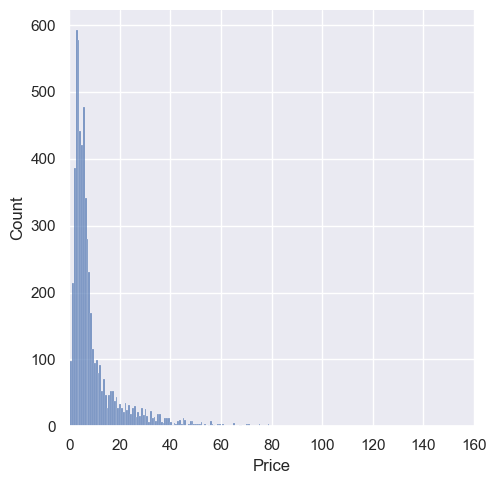

In [25]:
# Let's take a look at our target column (PRICE)

plt.figure()
sns.displot(train_data["Price"])
plt.xlim([0,160])
plt.show()

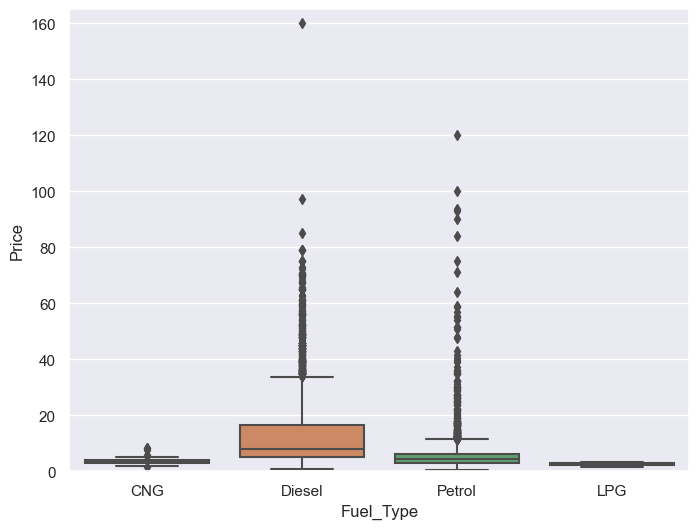

In [26]:
# Fuel_Type comparison
data = pd.concat([train_data["Price"], train_data["Fuel_Type"]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x="Fuel_Type", y="Price", data=data)
fig.axis(ymin=0, ymax=165);

-> Diesel cost the most, followed by Petrol

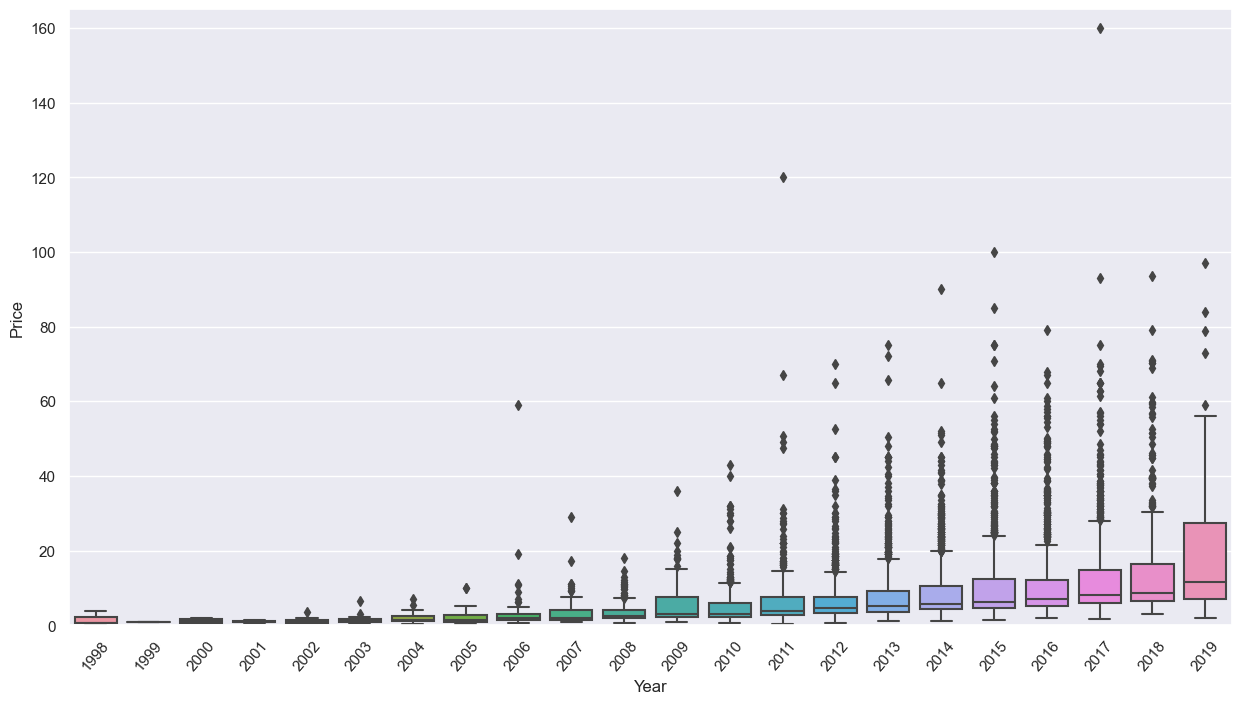

In [27]:
# Year
data = pd.concat([train_data["Price"], train_data["Year"]], axis=1)
f, ax = plt.subplots(figsize=(15,8))
fig = sns.boxplot(x="Year", y="Price", data=data)
fig.axis(ymin=0, ymax=165)
plt.xticks(rotation=50);

-> The price of new cars is higher in comparison to old ones

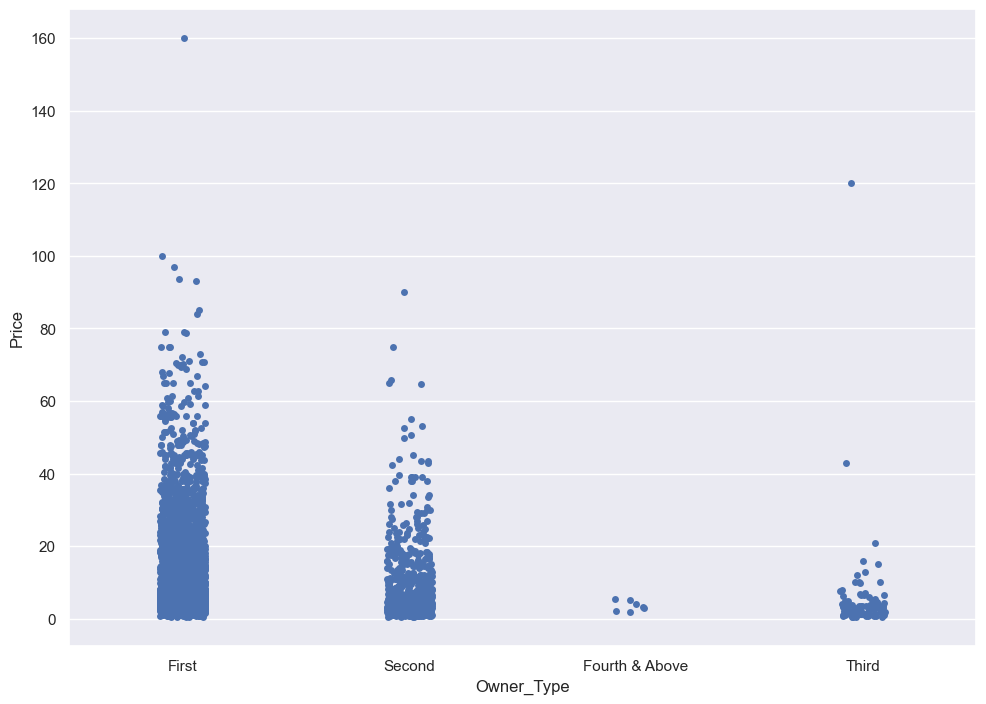

In [28]:
# Owner Type
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)
sns.stripplot(x="Owner_Type", y="Price", data=train_data)
plt.show()

<Figure size 640x480 with 0 Axes>

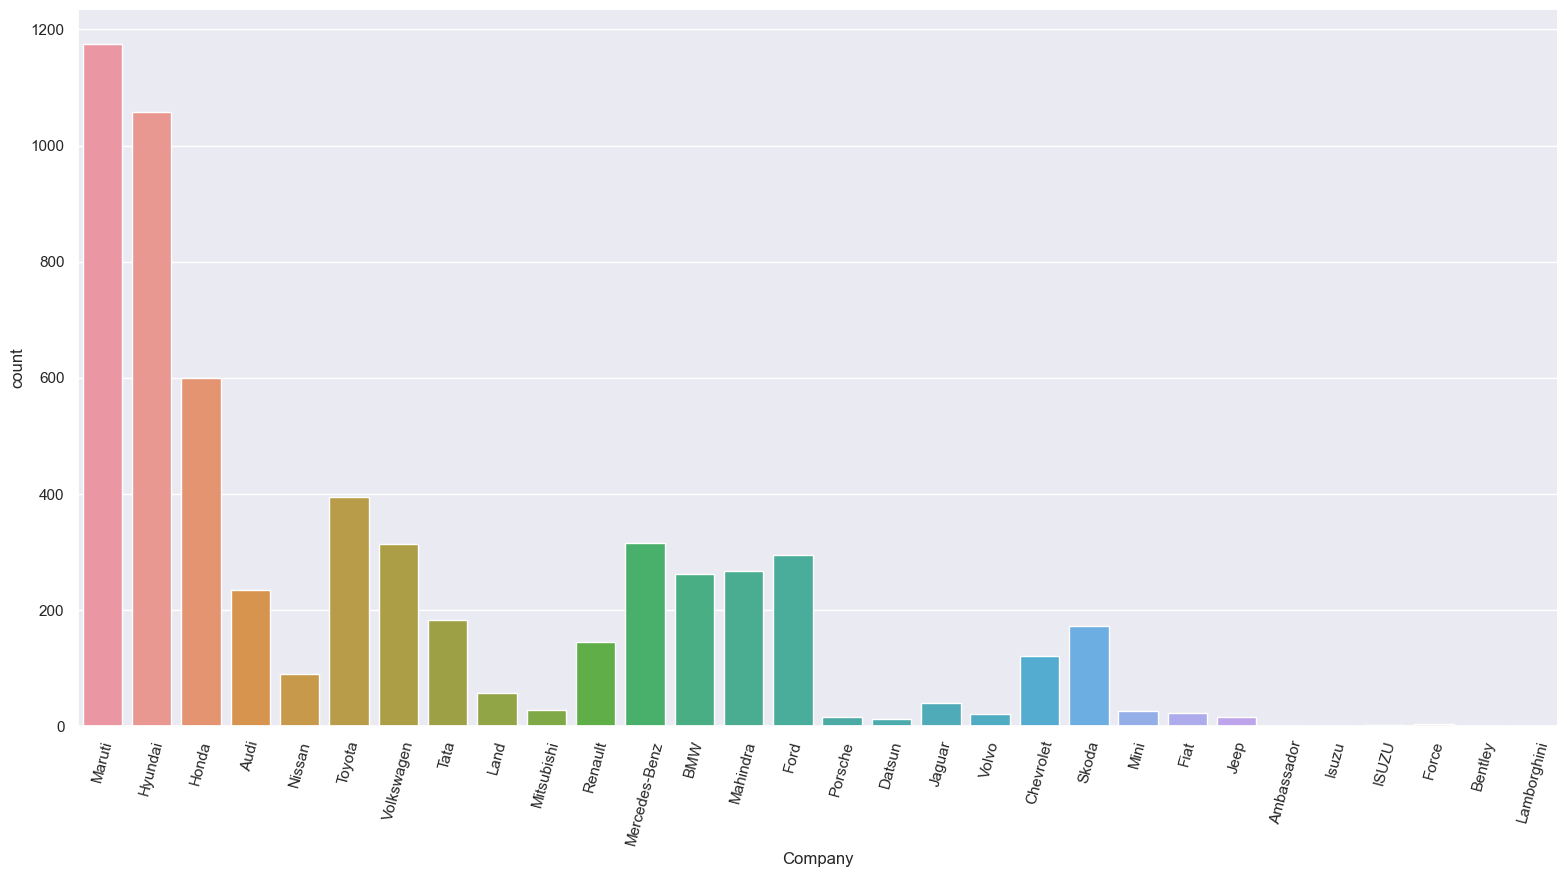

In [29]:
# Company
plt.figure()
sns.catplot(x="Company", kind="count", height=8, aspect=2, data=train_data)
plt.xticks(rotation=75)
plt.show()

-> Maruti is the most common brand followed by Hyundai and Honda

# Working with Categorical Data

At the moment we have 5 categorical features:

-Location

-Fuel_Type

-Transmission

-Owner_Type

-Company

-> We can use "OneHotEncoder" and "LabelEncoder" to handle this categorical data.

   OneHotEncoder is used when data is not in any order.
   
   LabelEncoder is used when data is in order.
   
   We use plots for each feature in order to check which "Encoder" to use.

In [30]:
# Location
train_data["Location"].value_counts()

Location
Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: count, dtype: int64

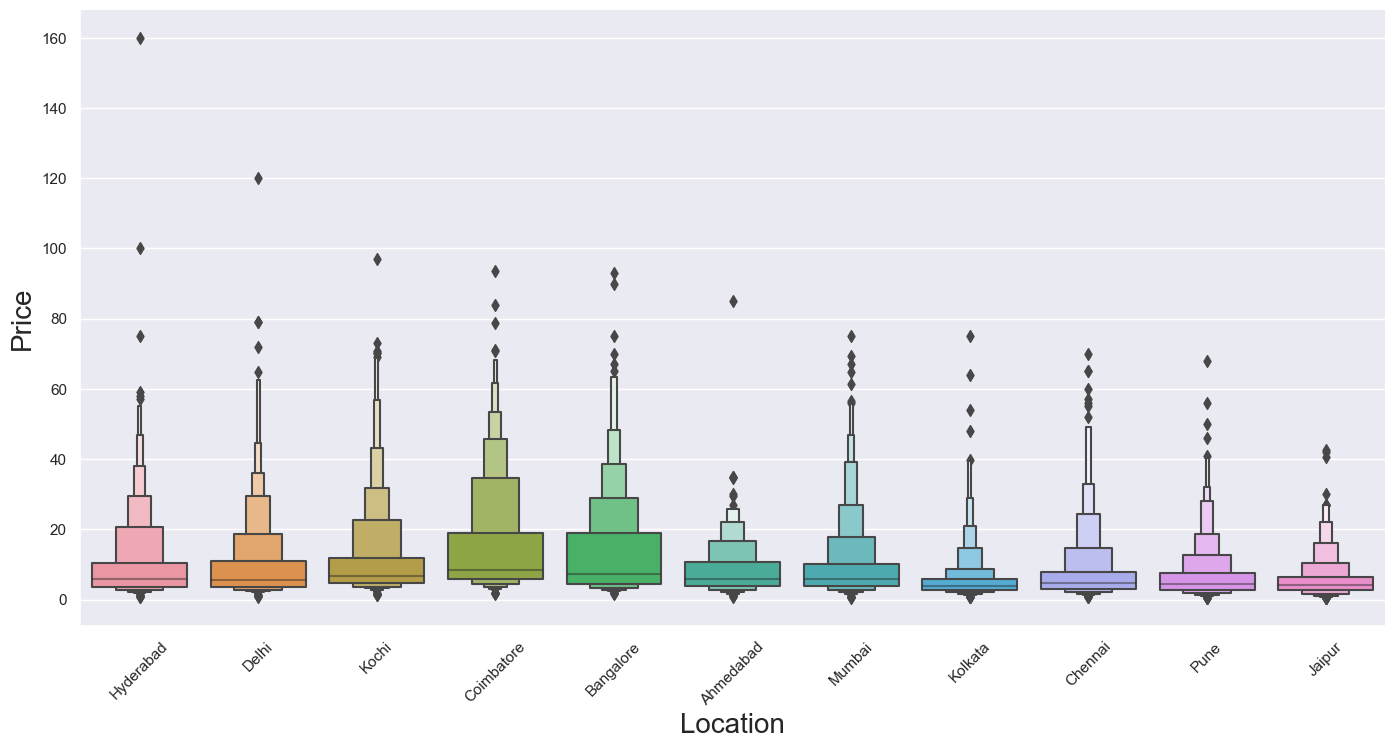

In [31]:
# Location vs Price
plot = sns.catplot(x="Location",
            y="Price", 
            data=train_data.sort_values("Price", ascending=False),
            kind="boxen", 
            height=7, 
            aspect=2)
plt.xticks(rotation=45)
plot.ax.set_xlabel("Location", fontsize=20)
plot.ax.set_ylabel("Price", fontsize=20)
plt.show()

-> OneHotEncoding

In [32]:
Location = pd.get_dummies(train_data[["Location"]], drop_first=True).astype(int)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


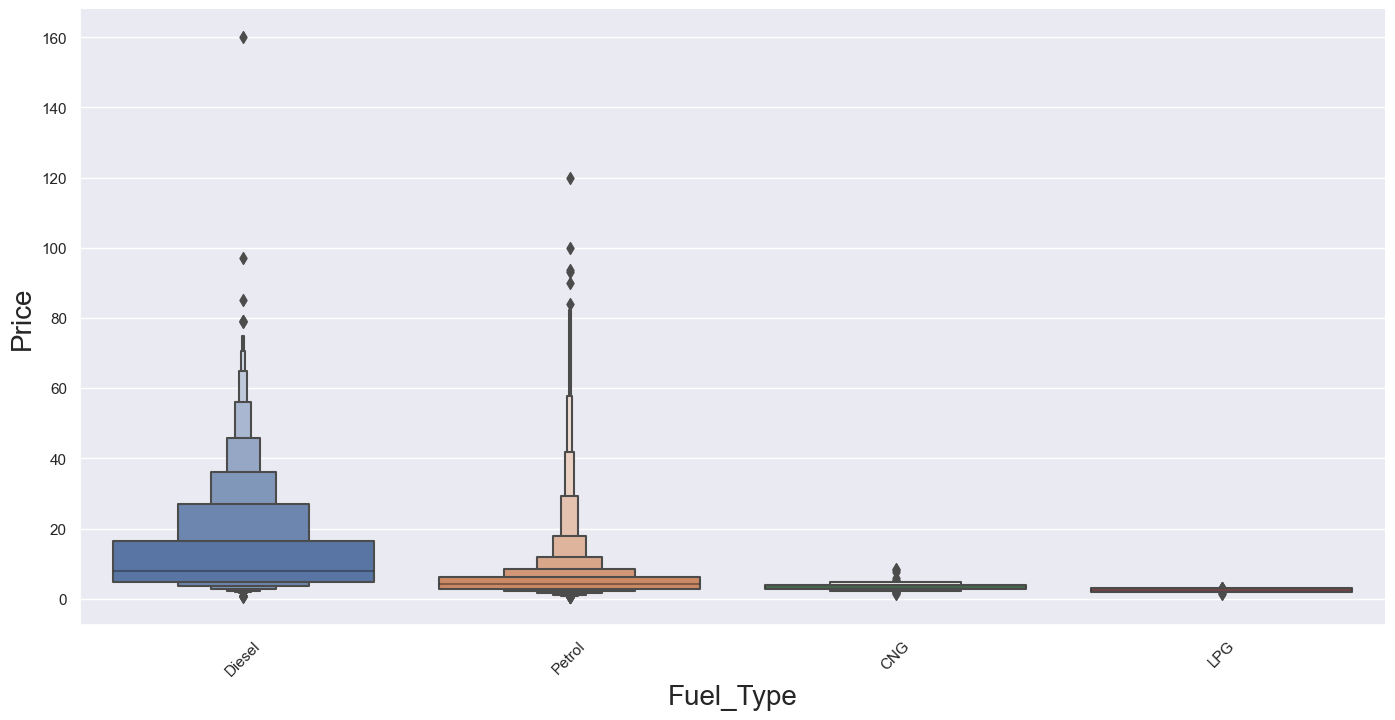

In [33]:
# Fuel_Type vs Price
plot = sns.catplot(x="Fuel_Type",
            y="Price", 
            data=train_data.sort_values("Price", ascending=False),
            kind="boxen", 
            height=7, 
            aspect=2)
plt.xticks(rotation=45)
plot.ax.set_xlabel("Fuel_Type", fontsize=20)
plot.ax.set_ylabel("Price", fontsize=20)
plt.show()

-> Again OneHotEncoding

In [34]:
Fuel = pd.get_dummies(train_data[["Fuel_Type"]], drop_first=True).astype(int)
Fuel.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


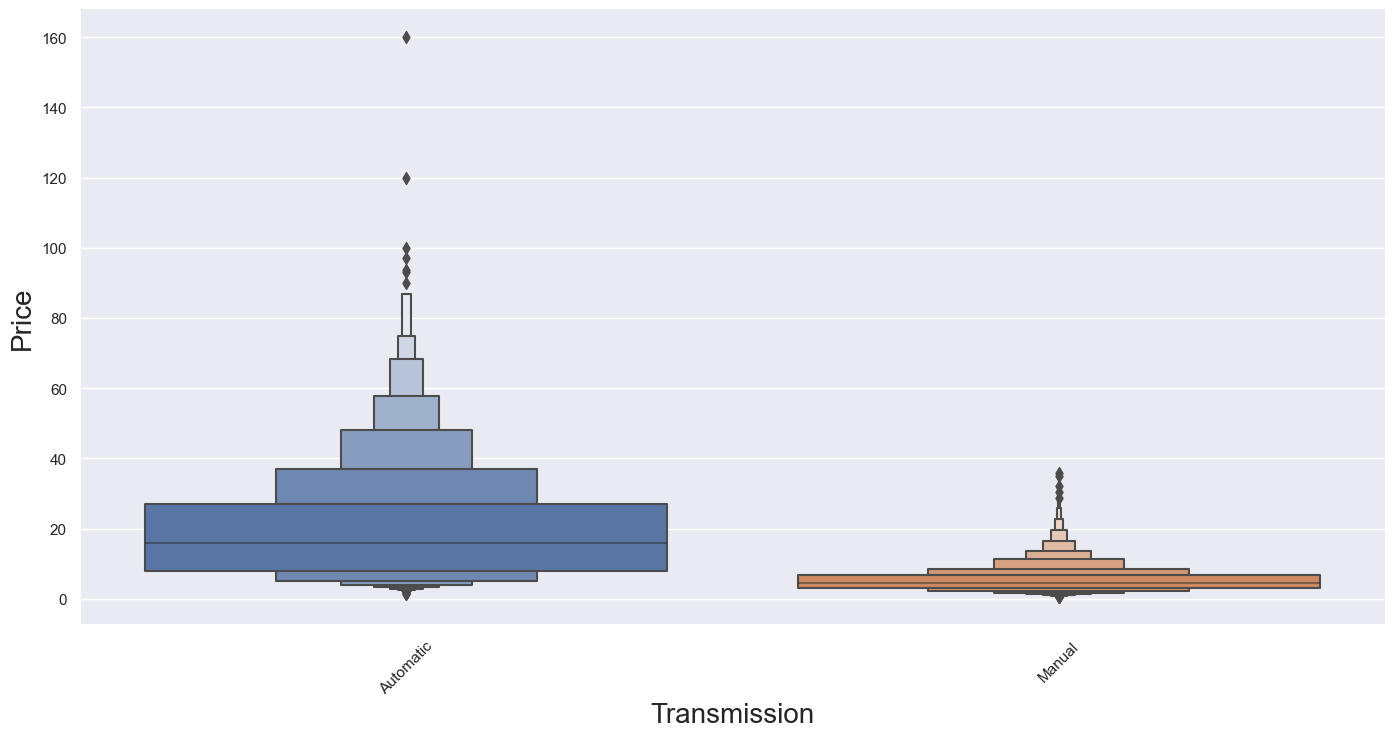

In [35]:
# Transmission vs Price
plot = sns.catplot(x="Transmission",
            y="Price", 
            data=train_data.sort_values("Price", ascending=False),
            kind="boxen", 
            height=7, 
            aspect=2)
plt.xticks(rotation=45)
plot.ax.set_xlabel("Transmission", fontsize=20)
plot.ax.set_ylabel("Price", fontsize=20)
plt.show()

-> OneHotEncoder here

In [36]:
Transmission = pd.get_dummies(train_data[["Transmission"]], drop_first=True).astype(int)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


In [37]:
train_data["Owner_Type"].value_counts()

Owner_Type
First             4839
Second             925
Third              101
Fourth & Above       7
Name: count, dtype: int64

-> We have a order now ->> LabelEncoder

In [38]:
train_data.replace({"First":1, "Second":2, "Third":3, "Fourth & Above":4}, inplace=True)
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


In [39]:
train_data["Company"].value_counts()

Company
Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: count, dtype: int64

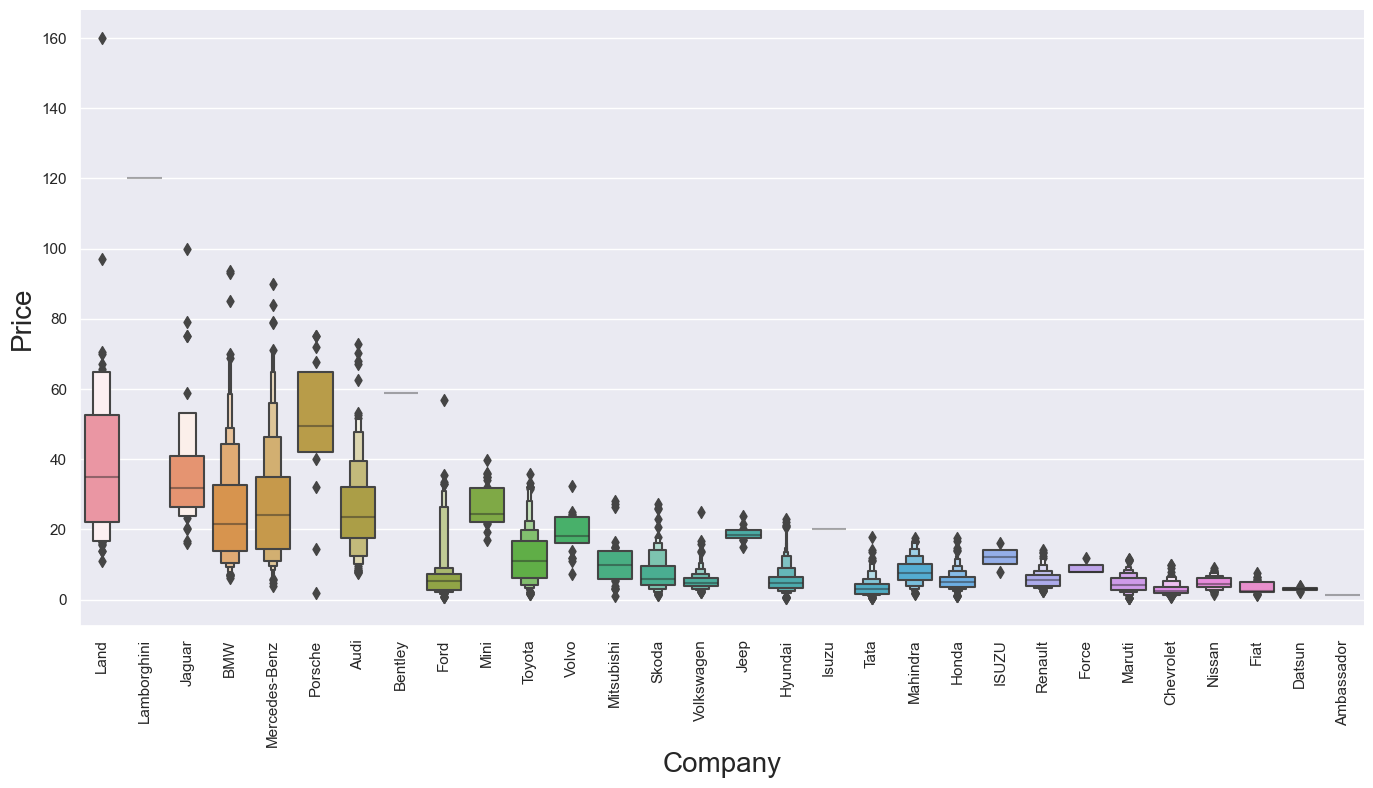

In [40]:
# Company vs Price
plot = sns.catplot(x="Company",
            y="Price", 
            data=train_data.sort_values("Price", ascending=False),
            kind="boxen", 
            height=7, 
            aspect=2)
plt.xticks(rotation=90)
plot.ax.set_xlabel("Company", fontsize=20)
plot.ax.set_ylabel("Price", fontsize=20)
plt.show()

-> A lot of variation, so lets drop them

In [41]:
train_data.drop(["Company"], axis=1, inplace=True)

In [42]:
final_train = pd.concat([train_data, Location, Fuel, Transmission], axis=1)
final_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,26.60,998.0,...,0,0,0,0,1,0,0,0,0,1
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,19.67,1582.0,...,0,0,0,0,0,1,1,0,0,1
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,18.20,1199.0,...,0,0,0,0,0,0,0,0,1,1
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,20.77,1248.0,...,0,0,0,0,0,0,1,0,0,1
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,15.20,1968.0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
final_train.drop(["Location", "Fuel_Type", "Transmission", "New_car_Price"], axis=1, inplace=True)
final_train.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,1.75,26.60,998.0,58.16,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,5.0,12.50,19.67,1582.0,126.20,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,5.0,4.50,18.20,1199.0,88.70,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,6.00,20.77,1248.0,88.76,0,1,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,5.0,17.74,15.20,1968.0,140.80,0,0,...,0,0,0,0,0,0,1,0,0,0


In [44]:
final_train.shape

(5872, 22)

In [45]:
final_train.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual'],
      dtype='object')

In [46]:
X = final_train.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual']]
X.shape

(5872, 21)

In [47]:
y = final_train['Price'].values.ravel()

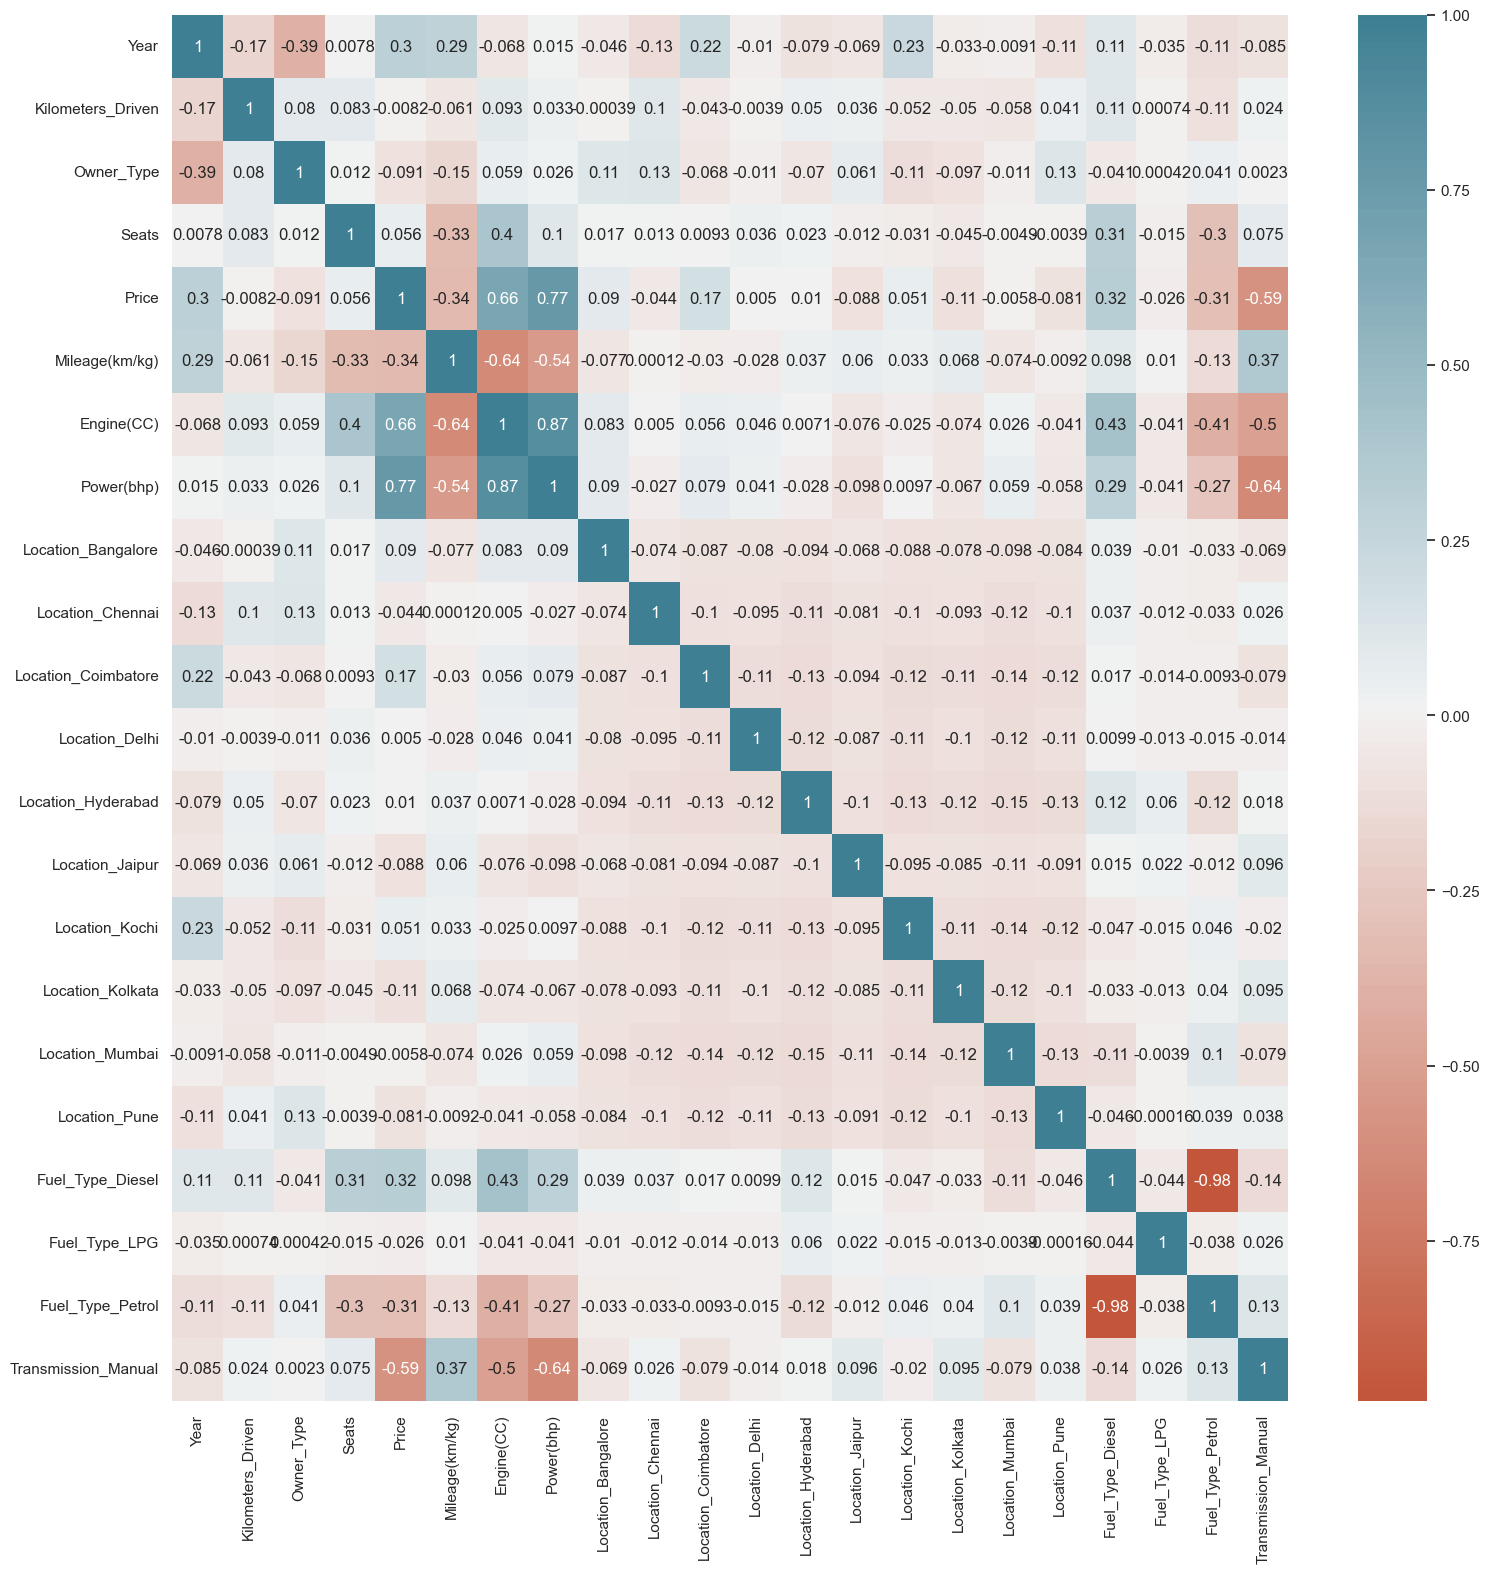

In [48]:
plt.figure(figsize=(18,18))
sns.heatmap(final_train.corr(),annot=True,cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

In [49]:
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

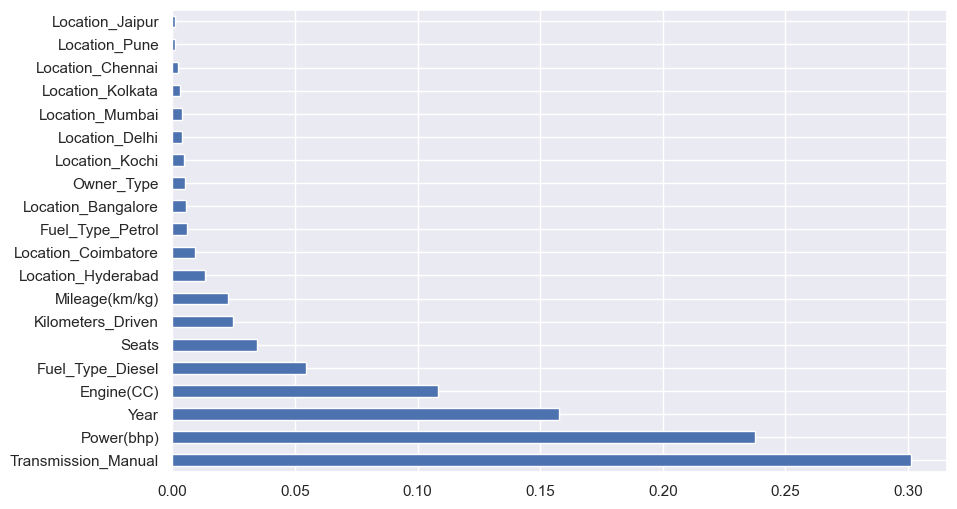

In [50]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (10,6))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Let´s train the model with different techniques

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

def evaluate_regression_models(X_train, y_train, X_test, y_test):
    
    # Linear Regression
    lreg = LinearRegression()
    lreg.fit(X_train, y_train)
    lreg_train_acc = lreg.score(X_train, y_train)
    lreg_test_acc = lreg.score(X_test, y_test)
    print("Linear Regression:")
    print("Accuracy on Training set: ", lreg_train_acc)
    print("Accuracy on Testing set: ", lreg_test_acc)

    # Decision Tree Regressor with Hyperparameter Tuning
    dt_param_dist = {
        'max_depth': np.arange(1, 21),
        'min_samples_split': np.arange(2, 21),
        'min_samples_leaf': np.arange(1, 21)
    }
    dt_reg = DecisionTreeRegressor()
    dt_random_search = RandomizedSearchCV(dt_reg, param_distributions=dt_param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)
    dt_random_search.fit(X_train, y_train)
    dt_reg_train_acc = dt_random_search.best_estimator_.score(X_train, y_train)
    dt_reg_test_acc = dt_random_search.best_estimator_.score(X_test, y_test)
    print("\nDecision Tree Regressor (with Hyperparameter Tuning):")
    print("Best Hyperparameters: ", dt_random_search.best_params_)
    print("Accuracy on Training set: ", dt_reg_train_acc)
    print("Accuracy on Testing set: ", dt_reg_test_acc)

    # Random Forest Regressor with Hyperparameter Tuning
    rf_param_dist = {
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
        'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],
        'min_samples_split': [2, 5, 10, 15, 100],
        'min_samples_leaf': [1, 2, 5, 10],
        'max_features': ['sqrt', 'log2'],
    }
    
    rf_reg = RandomForestRegressor()
    rf_random_search = RandomizedSearchCV(rf_reg, param_distributions=rf_param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)
    rf_random_search.fit(X_train, y_train)
    rf_reg_train_acc = rf_random_search.best_estimator_.score(X_train, y_train)
    rf_reg_test_acc = rf_random_search.best_estimator_.score(X_test, y_test)
    print("\nRandom Forest Regressor (with Hyperparameter Tuning):")
    print("Best Hyperparameters: ", rf_random_search.best_params_)
    print("Accuracy on Training set: ", rf_reg_train_acc)
    print("Accuracy on Testing set: ", rf_reg_test_acc)

evaluate_regression_models(X_train, y_train, X_test, y_test)

Linear Regression:
Accuracy on Training set:  0.7121551755203517
Accuracy on Testing set:  0.6779714271715338
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Decision Tree Regressor (with Hyperparameter Tuning):
Best Hyperparameters:  {'min_samples_split': 16, 'min_samples_leaf': 10, 'max_depth': 17}
Accuracy on Training set:  0.8950220087506999
Accuracy on Testing set:  0.8147912048661299
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Random Forest Regressor (with Hyperparameter Tuning):
Best Hyperparameters:  {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 25}
Accuracy on Training set:  0.9852024151166127
Accuracy on Testing set:  0.879023063647198


### The Random Forest Regressor, with hyperparameter tuning, achieved the highest accuracy on both the training and testing sets among the three models. While there's still a slight performance drop from training to testing, the difference is relatively small, suggesting that the model generalizes well to unseen data.

In [62]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  1.5030190109422494
Mean Squared  Error      :  13.771803193748479
Root Mean Squared  Error :  3.7110380210594016
R Squared Error          :  0.8687286808235265


#### Overall, the results indicate that the regression model performs relatively well. The R² value of 0.8687 indicates that a significant portion of the variability in the target variable is explained by the model. Additionally, the RMSE of 3.7110 suggests that the model's predictions are, on average, close to the actual values, with a relatively low prediction error